# Explaining and Interpreting Machine Learning Models

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" align="left" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a>&nbsp;| Dennis G. Wilson | <a href="https://github.com/d9w/interpretable_ml.git">https://github.com/d9w/interpretable_ml.git</a>

As machine learning models are used in more and more applications, explaining their functionality and their outputs becomes crucial. In critical applications like health and transportation, where an incorrect decision by an ML model can lead to serious consequences for people, understanding ML models is a must.

In this class, we'll look at understanding ML models used to predict heart disease.

There are multiple ways to understand a model, which are not mutually exclusive. We can **explain** data, the data features, the model's internals, and the model's predictions. Explainations use statistical measures to study different cases, ie, in 80% of cases, the model predicts X when a data feature has Y. We can also **interpret** the model, looking inside the model to see how it makes predictions.

<img src="https://d9w.github.io/interpretable_control/img/explaining.png">

Zhou, Ryan, and Ting Hu. "Evolutionary approaches to explainable machine learning." arXiv preprint arXiv:2306.14786 (2023).
https://arxiv.org/pdf/2306.14786

An explainable model is a function that is too complicated for a human to understand. Another name for this is a black-box model. We need an additional method/technique to be able to peer into the black-box and understand how the model works.

An interpretable model is one that can be understood by a human. However, as this is a subjective definition, the interpretability of a model is subject to opinion. One model is considered more interpretable than another if it is easier for a human to understand how it makes predictions than the other model.

<img src="https://miro.medium.com/v2/resize:fit:4800/format:webp/1*6-QWLr9obdDlUmVLtDXPrQ.png">

https://towardsdatascience.com/interperable-vs-explainable-machine-learning-1fa525e12f48

# Explaining Data

The first step to explaining data is to understand the source of the data. How was this information gathered? How is it organized? What are possible biases in the way in which it was gathered? 

The data we're looking at comes from phone surveys conducted by the [CDC](https://www.cdc.gov/brfss/annual_data/annual_2022.html) about people's health. The CDC website has more information on how this [Behavioral Risk Factor Surveillance System (BRFSS)](https://www.cdc.gov/brfss/annual_data/2022/pdf/Overview_2022-508.pdf) was conducted. We will look at predicting the `_MICHD` feature, which tracks if a surveyed person has had heart attack or diagnosed heart disease.

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
np.seterr(divide='ignore', invalid='ignore');

In [2]:
DATA_PATH = Path('data/')
RAW_DATA_PATH = DATA_PATH / 'raw'
RAW_FILE_PATH = RAW_DATA_PATH / 'LLCP2022.XPT'
PROCESSED_DATA_PATH = DATA_PATH / 'processed'
DATA_FILE = PROCESSED_DATA_PATH / 'data.csv'

In [3]:
heart_df = pd.read_sas(RAW_FILE_PATH, encoding='utf-8')
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Columns: 326 entries, _STATE to _AIDTST4
dtypes: float64(321), object(5)
memory usage: 1.1+ GB


In [4]:
heart_df['ID'] = np.arange(len(heart_df))
heart_df.describe()

,_STATE,FMONTH,DISPCODE,_PSU,CTELENM1,PVTRESD1,COLGHOUS,STATERE1,CELPHON1,LADULT1,...,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,ID
count,445132.000000,445132.000000,445132.000000,4.451320e+05,96051.000000,96050.000000,19.0,96050.0,96052.000000,96050.000000,...,51453.000000,445132.000000,4.451280e+05,445132.000000,4.451320e+05,445132.000000,168419.000000,168419.000000,398897.000000,445132.00000
mean,31.005942,6.767667,1120.636800,2.022005e+09,1.000021,1.000198,1.0,1.0,1.999979,1.001718,...,1.903932,2.243148,1.094561e+02,2.046278,1.142494e+04,1.952403,2.385313,2.572804,2.025465,222565.50000
std,16.652065,3.463248,40.469818,4.456324e+03,0.004563,0.014063,0.0,0.0,0.004563,0.041412,...,0.294688,2.314231,2.715247e+02,2.525965,3.137973e+04,2.509682,2.709972,2.910744,1.663272,128498.68435
min,1.000000,1.000000,1100.000000,2.022000e+09,1.000000,1.000000,1.0,1.0,1.000000,1.000000,...,1.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,0.00000
25%,18.000000,4.000000,1100.000000,2.022002e+09,1.000000,1.000000,1.0,1.0,2.000000,1.000000,...,2.000000,1.000000,5.397605e-79,1.000000,5.397605e-79,1.000000,1.000000,1.000000,1.000000,111282.75000
50%,30.000000,7.000000,1100.000000,2.022004e+09,1.000000,1.000000,1.0,1.0,2.000000,1.000000,...,2.000000,2.000000,7.000000e+00,1.000000,4.700000e+01,1.000000,1.000000,1.000000,2.000000,222565.50000
75%,46.000000,10.000000,1100.000000,2.022008e+09,1.000000,1.000000,1.0,1.0,2.000000,1.000000,...,2.000000,2.000000,4.300000e+01,1.000000,6.000000e+02,1.000000,2.000000,2.000000,2.000000,333848.25000
max,78.000000,12.000000,1200.000000,2.022026e+09,2.000000,2.000000,1.0,1.0,2.000000,2.000000,...,2.000000,9.000000,9.000000e+02,9.000000,9.990000e+04,9.000000,9.000000,9.000000,9.000000,445131.00000


In [5]:
var_list = {'ID': 'ID', 'SEXVAR': 'Sex', 'GENHLTH': 'GeneralHealth', '_STATE': 'State', 
            'PHYSHLTH': 'PhysicalHealth', 'MENTHLTH': 'MentalHealth', 'CHECKUP1': 'LastCheckup',
            'EXERANY2': 'Exercise', 'SLEPTIM1': 'Sleep', 'RMVTETH4': 'TeethRemoved', 'CVDSTRK3': 'Stroke',
            'ASTHMA3': 'Asthma', 'CHCSCNC1': 'SkinCancer', 'CHCCOPD3': 'LungDisease',
            'ADDEPEV3': 'Depression', 'CHCKDNY2': 'KidneyDisease', 'HAVARTH4': 'Arthritis',
            'DIABETE4': 'Diabetes', 'DEAF': 'Deaf', 'BLIND': 'Blind', 'DECIDE': 'DifficultyDeciding',
            'DIFFWALK': 'DifficultyWalking', 'DIFFDRES': 'DifficultyDressing', 'DIFFALON': 'DifficultyAlone',
            '_SMOKER3': 'Smoker', 'ECIGNOW2': 'ECigUser', '_AGEG5YR': 'Age', 'HTM4': 'Height',
            'WTKG3': 'Weight', '_BMI5': 'BMI', 'DRNKANY6': 'Alcohol', '_AIDTST4': 'HIVTest', 'FLUSHOT7': 'FluShot',
            'PNEUVAC4': 'Pneumonia', 'TETANUS1': 'Tetanus', 'HIVRISK5': 'HIVRisk', 'COVIDPOS': 'COVID',
            '_MICHD': 'HeartDisease'}

In [7]:
heart_df[['ID', '_MICHD']].describe()

,ID,_MICHD
count,445132.00000,440111.000000
mean,222565.50000,1.909680
std,128498.68435,0.286641
min,0.00000,1.000000
25%,111282.75000,2.000000
50%,222565.50000,2.000000
75%,333848.25000,2.000000
max,445131.00000,2.000000


In [8]:
df = heart_df[np.array(var_list.keys())]
dfpos = df[df['_MICHD'] == 1][:20000]
dfneg = df[df['_MICHD'] == 2][:20000]
df = pd.concat([dfpos, dfneg])
df = df.rename(columns=var_list)
df.describe()

,ID,Sex,GeneralHealth,State,PhysicalHealth,MentalHealth,LastCheckup,Exercise,Sleep,TeethRemoved,...,Weight,BMI,Alcohol,HIVTest,FluShot,Pneumonia,Tetanus,HIVRisk,COVID,HeartDisease
count,40000.000000,40000.000000,40000.000000,40000.000000,39998.000000,40000.000000,40000.000000,40000.000000,40000.000000,38678.000000,...,36957.000000,36463.000000,40000.000000,36053.000000,36316.000000,36198.000000,36139.000000,35849.000000,35786.000000,40000.000000
mean,61117.082675,1.485750,2.958950,9.946550,54.261063,60.252900,1.358475,1.326900,8.155175,4.325327,...,8443.861406,2890.598278,2.275325,2.112557,1.494135,1.798691,3.210548,2.004882,1.777595,1.500000
std,67894.303265,0.499803,1.157453,9.200856,37.358578,36.823196,1.035832,0.569425,9.048088,3.171884,...,2177.271714,664.746529,2.237129,1.782881,0.766570,1.414781,1.659142,0.545112,0.650595,0.500006
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2400.000000,1216.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,10114.750000,1.000000,2.000000,2.000000,14.000000,15.000000,1.000000,1.000000,6.000000,1.000000,...,6849.000000,2441.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
50%,20258.500000,1.000000,3.000000,4.000000,88.000000,88.000000,1.000000,1.000000,7.000000,3.000000,...,8165.000000,2789.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.500000
75%,112537.500000,2.000000,4.000000,18.000000,88.000000,88.000000,1.000000,2.000000,8.000000,8.000000,...,9525.000000,3219.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,2.000000
max,224799.000000,2.000000,9.000000,30.000000,99.000000,99.000000,9.000000,9.000000,99.000000,9.000000,...,29257.000000,9566.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000


In [9]:
for c in df.columns:
    if df[c].max() == 99:
        df.loc[df[c] == 99, c] = -1
    if df[c].max() == 88:
        df.loc[df[c] == 88, c] = 0
    if df[c].max() == 77:
        df.loc[df[c] == 77, c] = -1
    if df[c].max() == 9:
        df.loc[df[c] == 9, c] = -1
    if df[c].max() == 7:
        df.loc[df[c] == 7, c] = -1
df = df.replace(-1, np.nan)
df = df.dropna()
df['HeartDisease'] = df['HeartDisease'].replace([1, 2], [1, 0])
df = df.sample(frac=1, random_state=1234)
df['ID'] = np.arange(len(df))
df.describe()

,ID,Sex,GeneralHealth,State,PhysicalHealth,MentalHealth,LastCheckup,Exercise,Sleep,TeethRemoved,...,Weight,BMI,Alcohol,HIVTest,FluShot,Pneumonia,Tetanus,HIVRisk,COVID,HeartDisease
count,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,...,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000,23681.000000
mean,11840.000000,1.468181,2.904523,10.272708,6.473460,4.557451,1.319919,1.294498,7.068240,4.300114,...,8486.975930,2900.368734,1.541405,1.679659,1.437059,1.470757,2.805625,1.966598,1.743930,0.512816
std,6836.260198,0.498997,1.114385,9.217219,10.456719,8.800890,0.928306,0.455826,1.667553,3.174873,...,2166.242591,661.327354,0.498293,0.466618,0.496033,0.499155,1.167629,0.179688,0.486784,0.499846
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,2948.000000,1216.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5920.000000,1.000000,2.000000,4.000000,0.000000,0.000000,1.000000,1.000000,6.000000,1.000000,...,6985.000000,2451.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11840.000000,1.000000,3.000000,5.000000,0.000000,0.000000,1.000000,1.000000,7.000000,3.000000,...,8165.000000,2798.000000,2.000000,2.000000,1.000000,1.000000,3.000000,2.000000,2.000000,1.000000
75%,17760.000000,2.000000,4.000000,19.000000,8.000000,4.000000,1.000000,2.000000,8.000000,8.000000,...,9616.000000,3228.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000
max,23680.000000,2.000000,5.000000,30.000000,30.000000,30.000000,8.000000,2.000000,24.000000,8.000000,...,29257.000000,9566.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,3.000000,1.000000


In [10]:
df.to_csv(DATA_FILE, index=False)
#df = pd.read_csv(DATA_FILE)

## Visualization: General Health

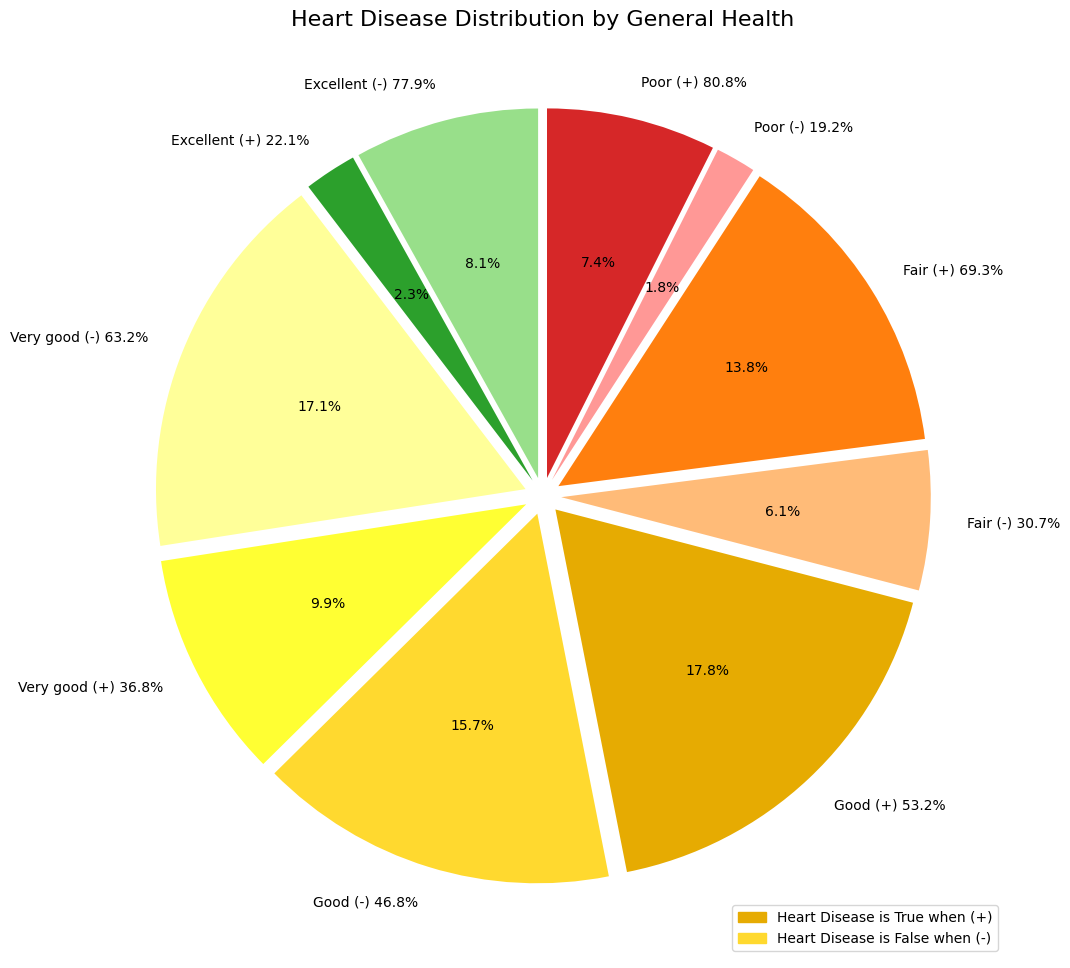

In [11]:
df_pie = df[['GeneralHealth', 'HeartDisease']].copy()
df_pie['GeneralHealth'] = df_pie['GeneralHealth'].replace([1, 2, 3, 4, 5],
                                ['Excellent', 'Very good', 'Good', 'Fair', 'Poor'])
grouped_data = df_pie.groupby(['GeneralHealth', 'HeartDisease']).size().unstack(fill_value=0)

# Converting the grouped data to proportions for the pie chart
pie_data = grouped_data.stack().reset_index(name='Count')
pie_data['Percentage'] = pie_data['Count'] / pie_data.groupby('GeneralHealth')['Count'].transform('sum') * 100

# Creating more concise labels
health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
pie_data['Label'] = pie_data.apply(lambda row: f"{row['GeneralHealth']} ({'+' if row['HeartDisease'] == 1 else '-'}) {row['Percentage']:.1f}%", axis=1)
pie_data['GeneralHealth'] = pd.Categorical(pie_data['GeneralHealth'], categories=health_order, ordered=True)

# Sorting the data
pie_data = pie_data.sort_values(by=['GeneralHealth', 'HeartDisease'], ascending=[True, True])

# Custom colors for Target == False and Target == True
colors_false = {'Excellent': '#98DF8A', 'Very good': '#FFFF99', 'Good': '#FFD92F',
                'Fair': '#FFBB78', 'Poor': '#FF9896'}
colors_true = {'Excellent': '#2CA02C', 'Very good': '#FFFF33', 'Good': '#E6AB02',
               'Fair': '#FF7F0E', 'Poor': '#D62728'}

# Applying the appropriate color based on Target
pie_data['Color'] = pie_data.apply(lambda row: colors_true[row['GeneralHealth']]
                                   if row['HeartDisease'] == 1
                                   else colors_false[row['GeneralHealth']], axis=1)

# Plotting the pie chart with the color scheme, exploded view
#explode_values = (0.05, 0.15, 0.05, 0.15, 0.05, 0.15, 0.05, 0.06, 0.05, 0.1)
explode_values = 0.05 * np.ones(len(pie_data['Label']))
# Creating custom legend
legend_elements = [mpatches.Patch(color='#E6AB02', label='Heart Disease is True when (+)'),
                   mpatches.Patch(color='#FFD92F', label='Heart Disease is False when (-)')]

plt.figure(figsize=(12, 12))
plt.pie(pie_data['Count'], labels=pie_data['Label'], autopct='%1.1f%%',
        startangle=90, colors=pie_data['Color'], explode=explode_values)
plt.title('Heart Disease Distribution by General Health', fontsize=16)
plt.legend(handles=legend_elements, loc='lower right')
plt.show();

## Visualization: Age and Sex

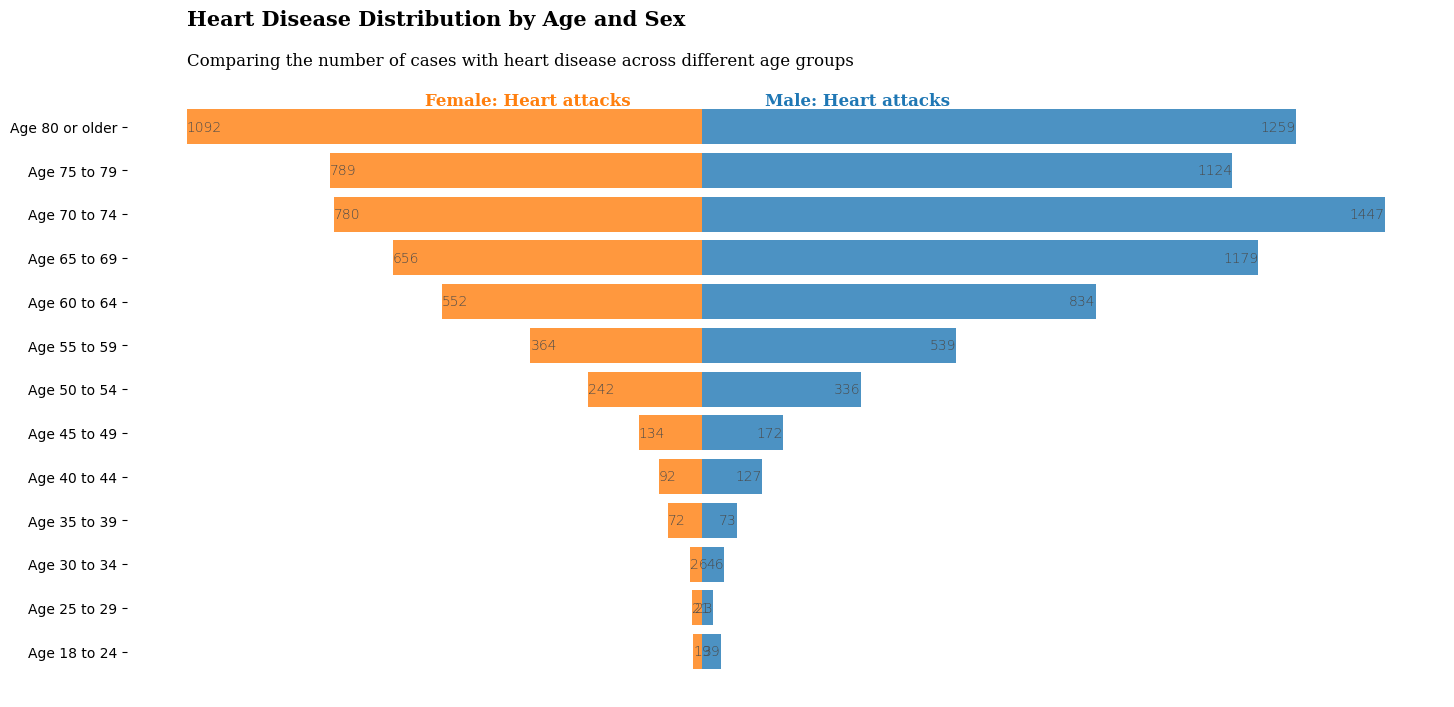

In [12]:
# Prepare the data
grouped_data = df.groupby(['Sex', 'Age', 'HeartDisease']).size().unstack().reset_index()
grouped_data['Total'] = grouped_data[0] + grouped_data[1]
grouped_data['Sex'] = grouped_data['Sex'].replace([1, 2], ['Male', 'Female'])
grouped_data = grouped_data[grouped_data.Age != 14]
grouped_data['Age'] = grouped_data['Age'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
['Age 18 to 24', 'Age 25 to 29', 'Age 30 to 34', 'Age 35 to 39', 'Age 40 to 44', 'Age 45 to 49',
 'Age 50 to 54', 'Age 55 to 59', 'Age 60 to 64', 'Age 65 to 69', 'Age 70 to 74', 'Age 75 to 79', 'Age 80 or older'])

# Separate data for males and females
male_data = grouped_data[grouped_data['Sex'] == 'Male']
female_data = grouped_data[grouped_data['Sex'] == 'Female']

# Set the figure
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
ax.barh(male_data['Age'], male_data[1], color='#1f77b4', alpha=0.8, label='Male: Heart Disease Yes')
ax.barh(female_data['Age'], -female_data[1], color='#ff7f0e', alpha=0.8, label='Female: Heart Disease Yes')

# Annotations and customization
for i in male_data['Age']:
    count = male_data[male_data['Age'] == i][1].values[0]
    ax.annotate(f"{count}", xy=(count, i), va='center', ha='right', fontweight='light', color='#4a4a4a',
                fontsize=10)
for i in female_data['Age']:
    count = female_data[female_data['Age'] == i][1].values[0]
    ax.annotate(f"{count}", xy=(-count, i), va='center', ha='left', fontweight='light', color='#4a4a4a',
                fontsize=10)

# Remove unnecessary axes and add titles
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.legend().set_visible(False)
fig.text(0.16, 0.95, 'Heart Disease Distribution by Age and Sex',
         fontsize=15, fontweight='bold', fontfamily='serif')
fig.text(0.16, 0.90, 'Comparing the number of cases with heart disease across different age groups',
         fontsize=12, fontweight='light', fontfamily='serif')
fig.text(0.5, 0.85, "Male: Heart attacks", fontweight="bold",
         fontfamily='serif', fontsize=12, color='#1f77b4')
fig.text(0.3, 0.85, "Female: Heart attacks", fontweight="bold",
         fontfamily='serif', fontsize=12, color='#ff7f0e')

plt.show()

## Visualization: Sleep Hours

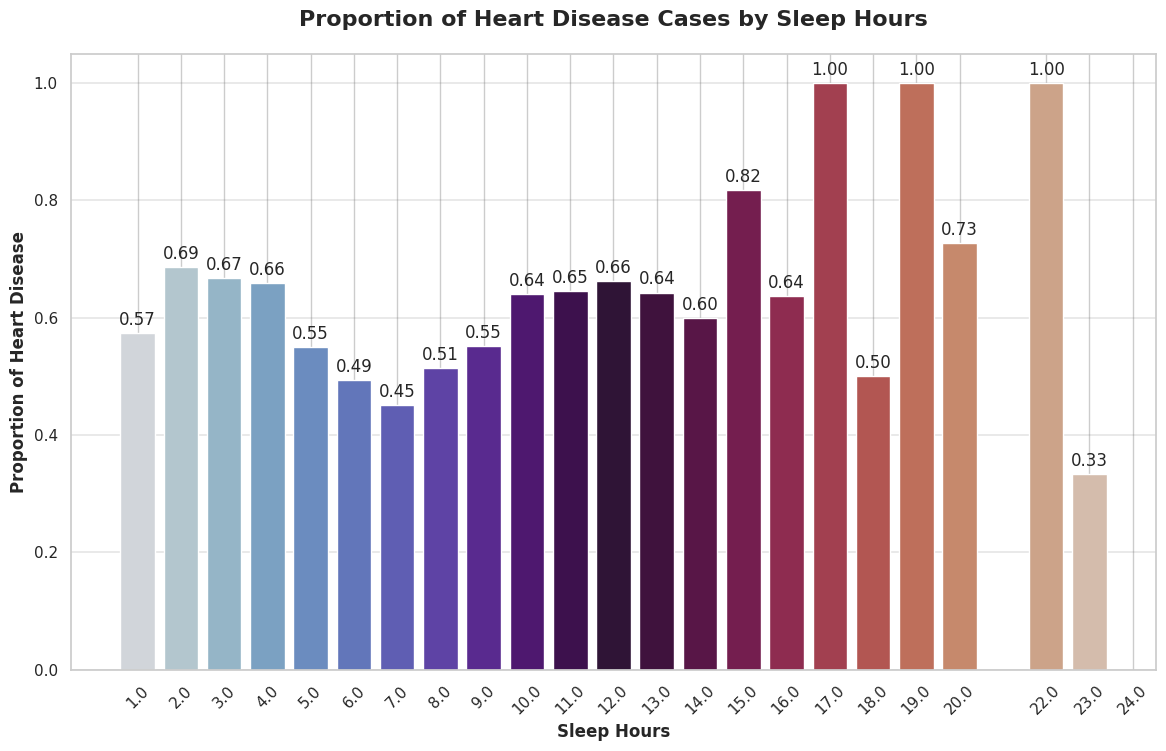

In [13]:
# Grouping data by 'Sleep' and calculating the proportion of 'HeartDisease: True'
sleep_hours_grouped = df.groupby('Sleep')['HeartDisease'].value_counts(normalize=True).unstack()

# Calculating the proportion of 'HeartDisease: True' for each sleep hour
sleep_hours_proportion_true = sleep_hours_grouped[1]

sleep_hours_proportion_true
# Grouping data by 'Sleep' and calculating the proportion of 'HeartDisease: True'
sleep_hours_grouped = df.groupby('Sleep')['HeartDisease'].value_counts(normalize=True).unstack()


# Setting a more visually appealing style
sns.set(style="whitegrid")

# Enhancing the aesthetics of the bar chart

# Creating the plot
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(sleep_hours_proportion_true.index, sleep_hours_proportion_true.values,
              color=sns.color_palette("twilight", len(sleep_hours_proportion_true)))

# Adding data labels
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

# Adjusting the grid and background
ax.set_facecolor('white')
ax.grid(color='grey', linestyle='-', linewidth=0.25, axis='y')

# Setting title and labels with customized font
ax.set_title('Proportion of Heart Disease Cases by Sleep Hours', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Sleep Hours', fontsize=12, fontweight='bold')
ax.set_ylabel('Proportion of Heart Disease', fontsize=12, fontweight='bold')

# Customizing ticks and limits
ax.set_xticks(sleep_hours_proportion_true.index)
ax.set_xticklabels(sleep_hours_proportion_true.index, rotation=45)
ax.set_ylim(0, max(sleep_hours_proportion_true.fillna(0)) + 0.05)  # Adding some space above the highest bar

plt.show()

# Explaining Machine Learning Model Predictions

We've seen how heart disease relates to certain features, but the goal of machine learning is to automate such analysis. Let's train an ML model and try to understand how it functions using statistical explanations.

In [14]:
tdf = df.copy().drop('ID', axis=1)
tdf = (tdf-tdf.min())/(tdf.max()-tdf.min())
tdf = tdf.dropna()
X = tdf.copy().drop('HeartDisease', axis=1)
y = tdf['HeartDisease'].copy()
ntrain = int(len(X)*0.7)
train_x = X[:ntrain]
train_y = y[:ntrain]
test_x = X[ntrain:]
test_y = y[ntrain:];

In [15]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)
train_x.describe()

(16576, 36) (16576,)
(7105, 36) (7105,)


,Sex,GeneralHealth,State,PhysicalHealth,MentalHealth,LastCheckup,Exercise,Sleep,TeethRemoved,Stroke,...,Height,Weight,BMI,Alcohol,HIVTest,FluShot,Pneumonia,Tetanus,HIVRisk,COVID
count,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,...,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000,16576.000000
mean,0.466940,0.476457,0.318824,0.213871,0.151627,0.044789,0.291566,0.263065,0.472766,0.897623,...,0.532081,0.210538,0.201634,0.538912,0.680924,0.438586,0.470500,0.601894,0.966337,0.372074
std,0.498921,0.278449,0.317836,0.347185,0.292869,0.132374,0.454497,0.072351,0.453817,0.303153,...,0.071724,0.082457,0.079196,0.498499,0.466133,0.496229,0.499144,0.388567,0.180366,0.244083
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.103448,0.000000,0.000000,0.000000,0.000000,0.217391,0.000000,1.000000,...,0.480000,0.153446,0.147186,0.000000,0.000000,0.000000,0.000000,0.333333,1.000000,0.000000
50%,0.000000,0.500000,0.137931,0.000000,0.000000,0.000000,0.000000,0.260870,0.285714,1.000000,...,0.526667,0.198297,0.189461,1.000000,1.000000,0.000000,0.000000,0.666667,1.000000,0.500000
75%,1.000000,0.750000,0.620690,0.266667,0.133333,0.000000,1.000000,0.304348,1.000000,1.000000,...,0.580000,0.253449,0.240958,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.895207,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
# train an XGBoost model
import xgboost
model = xgboost.XGBClassifier().fit(train_x, train_y)
print("Train accuracy: ", model.score(train_x, train_y))
print("Test accuracy: ", model.score(test_x, test_y))

Train accuracy:  0.981418918918919
Test accuracy:  0.928219563687544


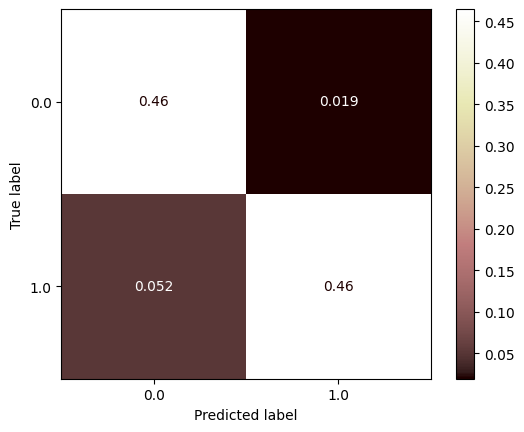

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
sns.reset_orig() 
disp = ConfusionMatrixDisplay.from_estimator(model, test_x, test_y, normalize='all', cmap='pink')

In [18]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(max_depth=3, n_estimators=30).fit(train_x, train_y)
print("Train accuracy: ", model_rf.score(train_x, train_y))
print("Test accuracy: ", model_rf.score(test_x, test_y))

Train accuracy:  0.9323721042471043
Test accuracy:  0.9318789584799437


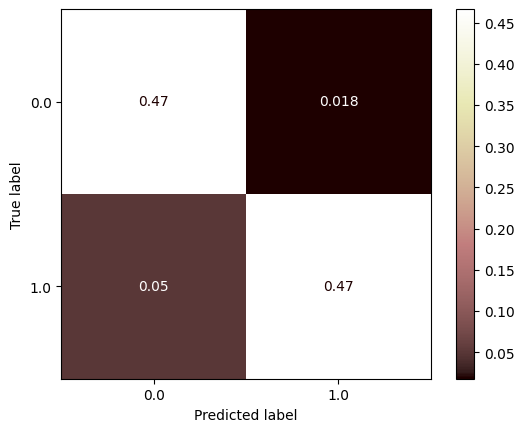

In [19]:
sns.reset_orig()
disp = ConfusionMatrixDisplay.from_estimator(model_rf, test_x, test_y, normalize='all', cmap='pink')

## SHAP

**SH**apley **A**dditive ex**P**lanations ([Lundberg et .al 2017](https://arxiv.org/abs/1905.04610))

In game theory, the [Shapley value](https://en.wikipedia.org/wiki/Shapley_value) (1953) is a measure for fairly distributing both gains and costs to several actors working in coalition.

The Shapley value applies primarily in situations when the contributions of each actor are unequal, but they work in cooperation with each other to obtain the payoff.

You first start by identifying each player’s contribution when they play individually, when 2 play together, and when all 3 play together. Their individual contributions could determine how important they are to they whole game, but the Shapley value is more fair. Which player do you think has the highest impact on the total payoff?

<p align="center">
<img src="https://raw.githubusercontent.com/d9w/interpretable_ml/main/images/ABC-wide.png" width=500>
</p>

Then, you need to consider all possible orders and calculate their marginal value – e.g. what value does each player add when player A enters the game first, followed by player B, and then player C.
Below are the 6 possible orders and the marginal value each player adds in the different combinations:
<p align="center">
<img src="https://raw.githubusercontent.com/d9w/interpretable_ml/main/images/ABC-updated.png" width=500>
</p>

Now that we have calculated each player’s marginal value across all 6 possible order combinations, we now need to add them up and work out the Shapley value (i.e. the average) for each player.

In [20]:
a = [7, 7, 10, 3, 9, 10]
b = [4, 0, 4, 4, 4, 3]
c = [8, 12, 5, 12, 6, 6]
print("Check for sum: ", [a[i]+b[i]+c[i] for i in range(len(a))])
print("Shapley values:")
print("A: ", np.sum(a)/6)
print("B: ", np.sum(b)/6)
print("C: ", np.sum(c)/6)

Check for sum:  [19, 19, 19, 19, 19, 19]
Shapley values:
A:  7.666666666666667
B:  3.1666666666666665
C:  8.166666666666666


Computing the Shapley value for each player will give the true contribution each player made to the game and assign credit fairly. In this case, player C has a higher contribution, even though their contribution when playing individually is smaller.

### SHAP for Explainability

To use SHAP for machine learning models, we will consider the features of our datas as players in the cooperative game of prediction. Each value of an independent variable or a feature for a given sample is a part of a cooperative game where we assume that prediction is actually the payout. Shapley values correspond to the contribution of each feature towards pushing the prediction away from the expected value.

In [21]:
import shap

# explain the model's predictions using SHAP
explainer = shap.Explainer(model)
shap_values = explainer(train_x)

[16:31:17] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [22]:
shap_values.shape

(16576, 36)

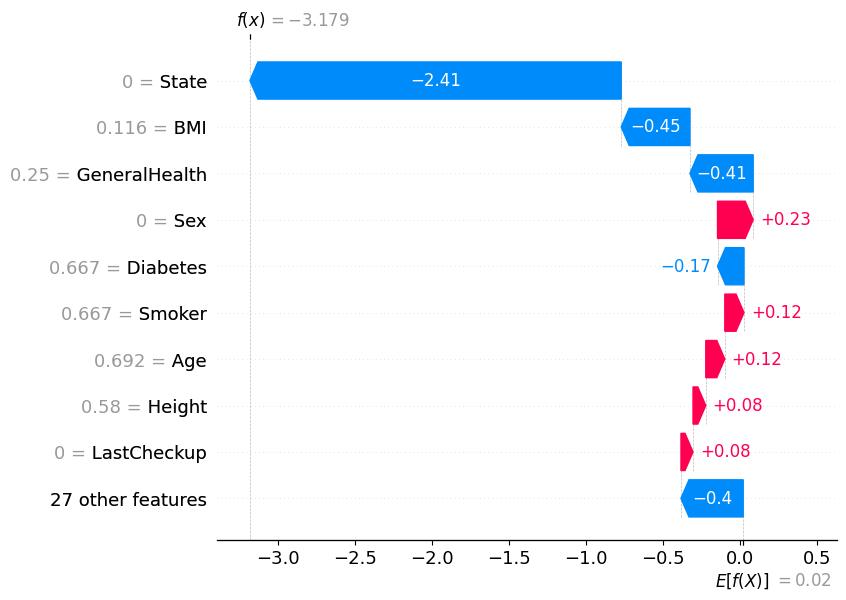

In [23]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[123, :])

The Shapley values are calculated for each row. As such, understanding the explanation overall of how the model functions is not very clear. Aggregate methods like beeswarm plots help with understanding the overall behavior of the model.

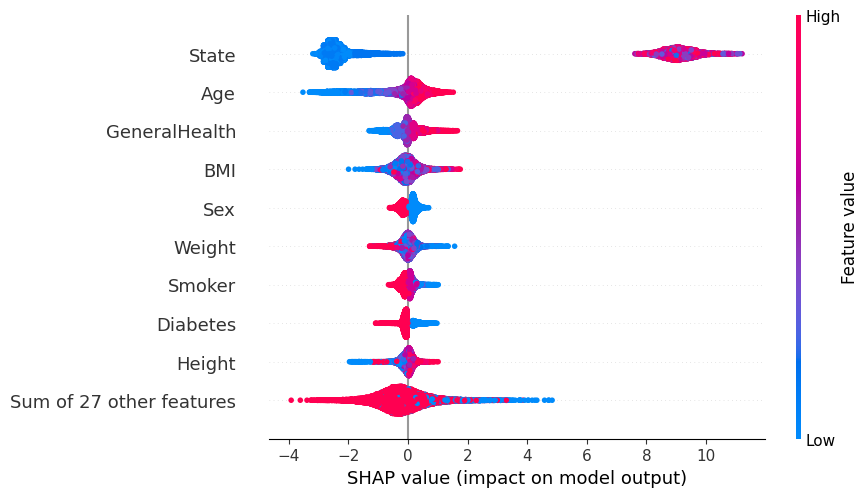

In [24]:
shap.plots.beeswarm(shap_values)

In [25]:
# explain the Random Forest model's predictions using SHAP
explainer = shap.Explainer(model_rf)
shap_values_rf = explainer(train_x)

In [26]:
shap_values_rf.shape

(16576, 36, 2)

A small note: due to how Random Forests output their predictions, the shape of the Shapley values is different. Each explanation is also split based on the label.

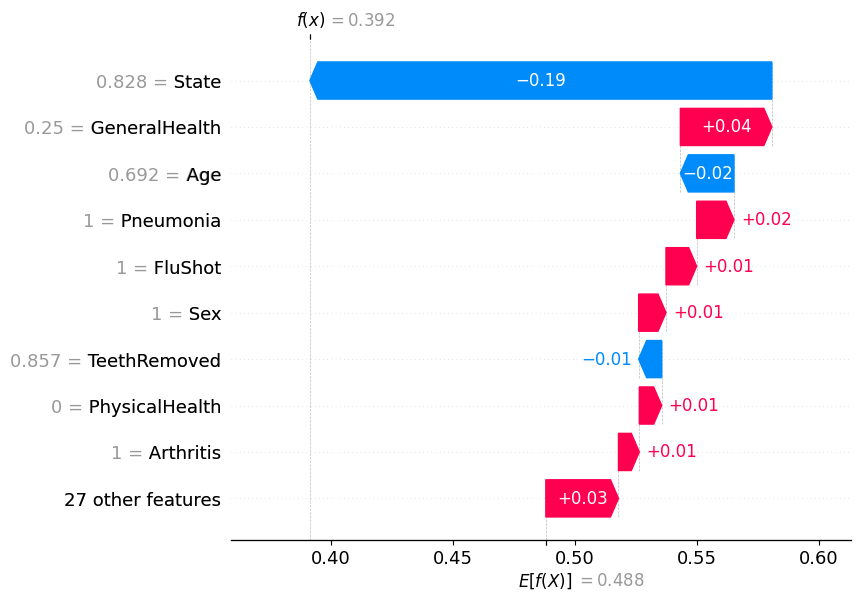

In [27]:
shap.plots.waterfall(shap_values_rf[1234, :, 0])

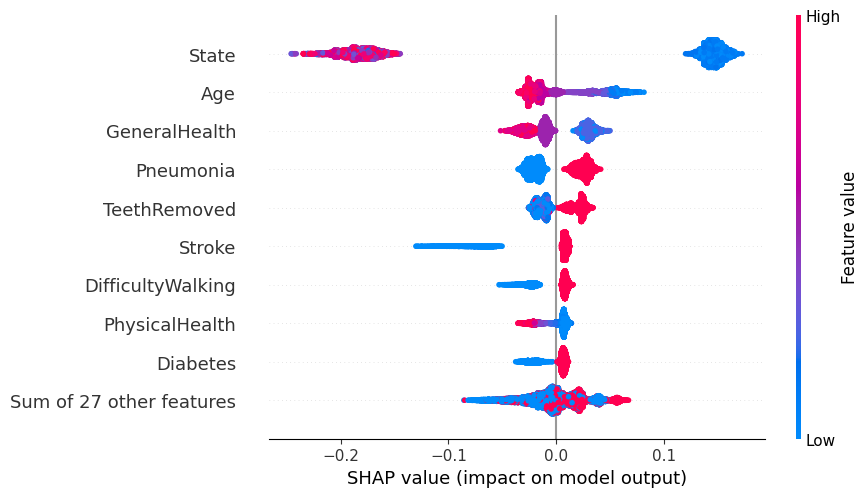

In [28]:
shap.plots.beeswarm(shap_values_rf[:,:,0])

SHAP is a state of the art method and has a great library. It is far from the only explanation method however, there others like [LIME](https://github.com/marcotcr/lime), [PDPs and ICE Plots](https://medium.com/towards-data-science/the-ultimate-guide-to-pdps-and-ice-plots-4182885662aa).

# Interpretable Machine Learning

However, what if we could go beyond explaining? Our model of a gradient boosting algorithm is a black-box, so we can't look inside of it. If we use an interpretable model, we can see how the decision is being made at every step of the model's logic. Decision Trees, the base component of Random Forests, are one such model that is considered interpretable.

In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

model = DecisionTreeClassifier(max_depth=3).fit(train_x, train_y)
print("Train accuracy: ", model.score(train_x, train_y))
print("Test accuracy: ", model.score(test_x, test_y))

Train accuracy:  0.9315878378378378
Test accuracy:  0.9308937368050668


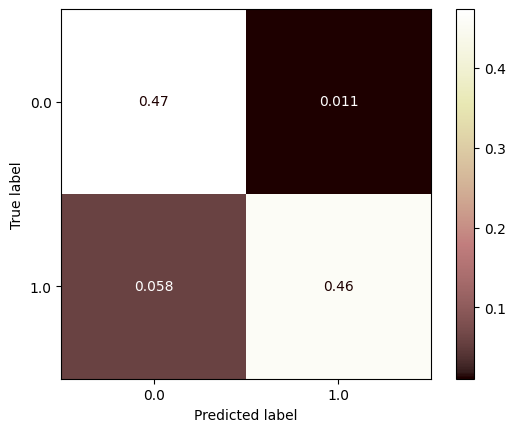

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
sns.reset_orig()
disp = ConfusionMatrixDisplay.from_estimator(model, test_x, test_y, normalize='all', cmap='pink')

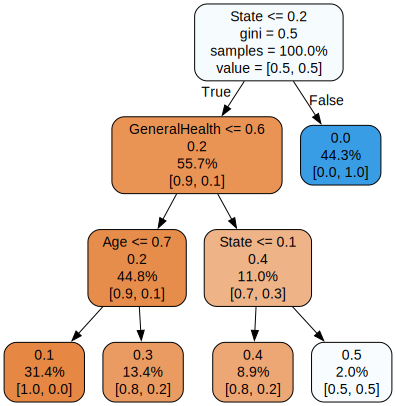

In [31]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(model, feature_names=train_x.columns,
                                filled=True, rounded=True, proportion=True,
                                precision=1, label='root')
graph = graphviz.Source(dot_data)  
graph 

Decision Trees illustrate also why interpretability is a spectrum. The larger the tree is, the harder it is to understand. Increase the max depth and replot the tree. Would you be able to explain this model to a doctor or a patient? Is it interpretable?

### Genetic Programming

Genetic Programming is a less well-known method for interpretable machine learning. Also known as symbolic regression, genetic programming combines predetermined functions in a representation like a tree, list, or graph. This graph is randomly modified and optimized using an evolutionary algorithm in order to improve model performance. A parameter known as parsimony determines if smaller, but slightly worse, models can be accepted. We will use the [gplearn](https://gplearn.readthedocs.io/) library, which implements tree-based GP in a scikit-learn syntax.

In [32]:
from gplearn.genetic import SymbolicClassifier

model_gp = SymbolicClassifier(parsimony_coefficient=0.01,
                         feature_names=train_x.columns,
                         random_state=1)
model_gp.fit(train_x, train_y)
print("Train accuracy: ", model.score(train_x, train_y))
print("Test accuracy: ", model.score(test_x, test_y))

Train accuracy:  0.9315878378378378
Test accuracy:  0.9308937368050668


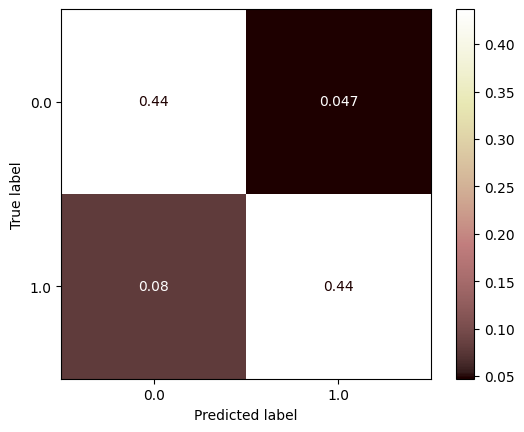

In [33]:
disp = ConfusionMatrixDisplay.from_estimator(model_gp, test_x, test_y, normalize='all', cmap='pink')

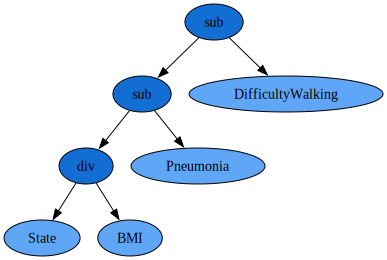

In [34]:
dot_data = model_gp._program.export_graphviz()
graph = graphviz.Source(dot_data)
graph.render('images/ex1_child', format='png', cleanup=True)
graph